#Introduction

Two facets of the Parrondo paradox in chaos theory:


*   CCO: Chaos + Chaos $\to$ Order. Suppression of chaos.
*   OOC: Order + Order $\to$ Chaos. Emergence of chaos



#Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from decimal import Decimal, getcontext
import math  # Used for Decimal.ln()

getcontext().prec = 40 # --- Decimal Precision Setting ---

def timeSeries_logistic_P11(rA, rB, x0, tMax, tLast, inicio):
    """ Simulates the Logistic Map time series and calculates the Lyapunov exponent
    using a switching protocol.
    """

    # 1. Generate the periodic protocol
    pattern = [inicio, 1 - inicio] # Example: If inicio=1, creates [1, 0, 1, 0, 1, 0, ...]
    z_t = np.tile(pattern, tMax // 2 + 1)[:tMax] # np.tile repeats the pattern, then we slice to tMax

    # Calculate the sequence of 'r' values: vr = rA * (1 - z_t) + rB * z_t
    vr = rA * (1 - z_t) + rB * z_t # z=0 -> rA, z=1 -> rB

    # 2. Initialization
    x = Decimal(str(x0))
    vx = [x]

    tTran = tMax - tLast
    lyapSum = Decimal('0.0')

    # 3. Time Series Iteration and Lyapunov Calculation
    # Iterate through the entire time series (t=1 to tMax-1)
    for t in range(1, tMax, 1):
        r = Decimal(str(vr[t]))
        x = r * x * (Decimal('1.0') - x) # Logistic Map: x_{t+1} = r * x_t * (1 - x_t)
        vx.append(x)

        # Lyapunov Exponent Calculation (Semi-analytic method) - Only after transient
        if t >= tTran:
            derivf = r - Decimal('2.0') * r * x # Derivative: f'(x) = r - 2*r*x
            lyapSum += abs(derivf).ln() # Use Decimal.ln() for natural logarithm

    # 4. Final results

    lyapMean = lyapSum / Decimal(tLast) # Temporal average (only over the tLast steps)

    # Create time vector and convert Decimal values for plotting
    vt  = np.arange(len(vx))
    vx_plot = [float(val) for val in vx]

    return vt, vx_plot, lyapMean




# --- Plotting Function ---
def plot_results(rA, rB, x0, tMax, tLast, inicio):
    """Generates the three-panel plot for the results."""

    fig, axes = plt.subplots(1, 3, figsize=(12, 3), sharey=True, gridspec_kw={'wspace': 0})

    # Case A (Only rA)
    # The function uses rA for both rA and rB inputs, resulting in a constant r
    vt, vx, lyapA = timeSeries_logistic_P11(rA, rA, x0, tMax, tLast, inicio)
    axes[0].plot(vt, vx, '*--', label='A', linewidth=0.05)
    axes[0].set_xlabel('Time (t)', fontsize=14)
    axes[0].set_ylabel('x', fontsize=16)
    axes[0].set_title(r'(a) $r_A$ = {:.4f}  $\lambda_A$ = {:.4f}'.format(rA, lyapA), fontsize=14)

    # Case B (Only rB)
    vt, vx, lyapB = timeSeries_logistic_P11(rB, rB, x0, tMax, tLast, inicio)
    axes[1].plot(vt, vx, '*--', label='B', linewidth=0.05)
    axes[1].set_xlabel('Time (t)', fontsize=14)
    axes[1].set_title(r'(b) $r_B$ = {:.4f}  $\lambda_B$ = {:.4f}'.format(rB, lyapB), fontsize=14)

    # Case AB (Switching Protocol)
    vt, vx, lyapAB = timeSeries_logistic_P11(rA, rB, x0, tMax, tLast, inicio)
    axes[2].plot(vt, vx, '*--', label='AB', linewidth=0.05)
    axes[2].set_xlabel('Time (t)', fontsize=14)
    axes[2].set_title(r'(c) AB: $\lambda_{AB}$ = %1.4f'%( lyapAB), fontsize=14)

    # Final plot settings
    plt.ylim([0, 1])
    plt.tight_layout()


#Examples

#CCO



*   CCO: Chaos + Chaos $\to$ Order. Suppression of chaos.



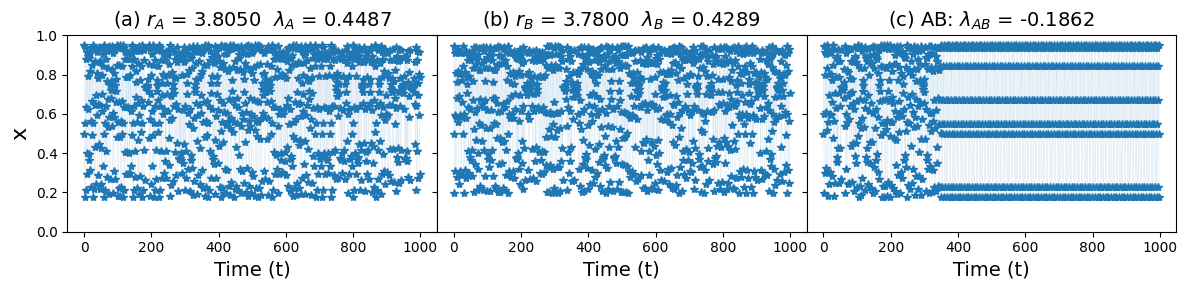

In [2]:
# Simulation Parameters
tMax  = 1000
tLast = 500

rA     = 3.805
rB     = 3.780
x0     = 0.5
inicio = 0 # Start with 0(A) or 1(B)

plot_results(rA, rB, x0, tMax, tLast, inicio)

##OOC



*   OOC: Order + Order $\to$ Chaos. Emergence of chaos



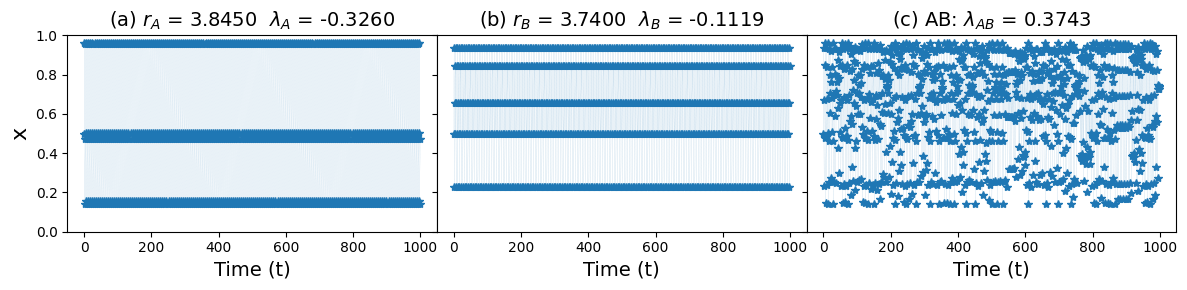

In [3]:
# Simulation Parameters
tMax  = 1000
tLast = 500

rA     = 3.845
rB     = 3.740
x0     = 0.5
inicio = 0 # Start with 0(A) or 1(B)

plot_results(rA, rB, x0, tMax, tLast, inicio)